In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_points(num_points, num_dimensions):
    return np.random.randn(num_points, num_dimensions)

In [3]:
def average_distance_sp(points, selected_point):
    return np.mean(np.linalg.norm(points - selected_point, axis=1))

In [4]:
def minimum_distance_sp(points, selected_point):
    return np.min(np.linalg.norm(points - selected_point, axis=1))

In [5]:
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist

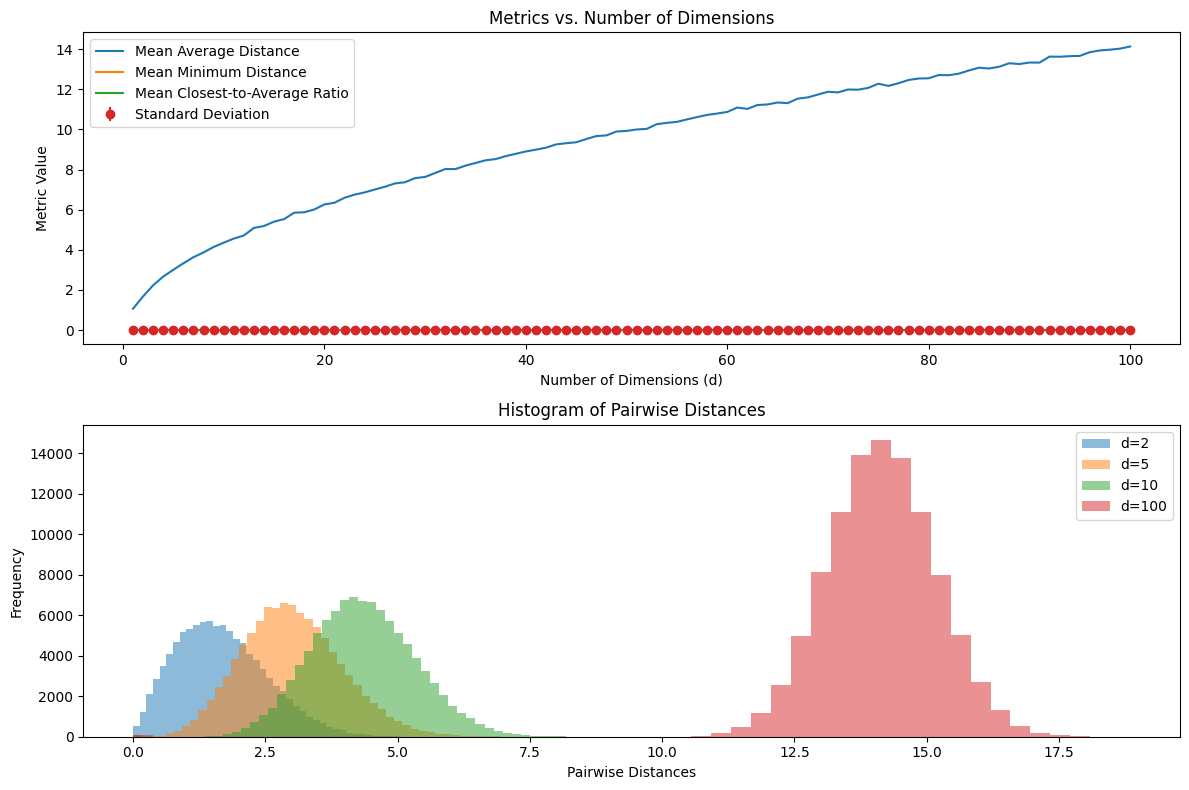

In [6]:
def experiment_and_visualization():
    dimensions = range(1, 101)
    mean_avg_distances = []
    mean_min_distances = []
    mean_closest_to_avg_ratios = []
    std_devs = []
    hist_data = {2: [], 5: [], 10: [], 100: []}

    for d in dimensions:
        avg_distances = []
        min_distances = []
        closest_to_avg_ratios = []

        for _ in range(100):
            points = random_points(1000, d)
            selected_point = points[np.random.randint(0, 1000)]

            avg_dist = average_distance_sp(points, selected_point)
            min_dist = minimum_distance_sp(points, selected_point)

            avg_distances.append(avg_dist)
            min_distances.append(min_dist)
            closest_to_avg_ratios.append(closest_to_average_ratio(min_dist, avg_dist))

            if d in hist_data:
                hist_data[d].extend(np.linalg.norm(points - selected_point, axis=1))

        mean_avg_distances.append(np.mean(avg_distances))
        mean_min_distances.append(np.mean(min_distances))
        mean_closest_to_avg_ratios.append(np.mean(closest_to_avg_ratios))
        std_devs.append(np.std(closest_to_avg_ratios))

    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(dimensions, mean_avg_distances, label='Mean Average Distance')
    plt.plot(dimensions, mean_min_distances, label='Mean Minimum Distance')
    plt.plot(dimensions, mean_closest_to_avg_ratios, label='Mean Closest-to-Average Ratio')
    plt.errorbar(dimensions, mean_closest_to_avg_ratios, yerr=std_devs, fmt='o', label='Standard Deviation')
    plt.xlabel('Number of Dimensions (d)')
    plt.ylabel('Metric Value')
    plt.title('Metrics vs. Number of Dimensions')
    plt.legend()

    plt.subplot(2, 1, 2)
    for d, data in hist_data.items():
        plt.hist(data, bins=50, alpha=0.5, label=f'd={d}')
    plt.xlabel('Pairwise Distances')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pairwise Distances')
    plt.legend()

    plt.tight_layout()
    plt.show()

experiment_and_visualization()